<a href="https://colab.research.google.com/github/amrahmani/Marketing/blob/main/AIMarketing_Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset from https://github.com/amrahmani/Marketing/blob/main/consumer_sales_data.csv

Delete rows with Negative Quantity and UnitPrice

Identify Missing Values

Impute Missing Values

Remove Rows or Columns with High Missing Percentaget

consumer_sales_data.csv = "ProductID, ProductCategory, ProductBrand,	ProductPric,	CustomerAge, 	CustomerGender,	PurchaseFrequency,	CustomerSatisfaction,	PurchaseIntent"

In [ ]:
import pandas as pd
import numpy as np

# 1. Load the Dataset
url = 'https://raw.githubusercontent.com/amrahmani/Marketing/main/consumer_sales_data.csv'
df = pd.read_csv(url)

# Display the first 5 rows and info about the dataframe
print("Initial DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

# 2. Delete rows with Negative Quantity and UnitPrice (Assuming these columns exist or similar)
# I'll assume you meant ProductPrice instead of UnitPrice.
# Adjust column names if necessary.
if 'ProductPrice' in df.columns:
    df = df[df['ProductPrice'] >= 0]
else:
    print("\n'ProductPrice' column not found. Skipping this step.")

# 3. Identify Missing Values
print("\nMissing Values (before imputation):")
print(df.isnull().sum())

# 4. Impute Missing Values
# Strategy:
#   - Numerical columns: Impute with the mean
#   - Categorical columns: Impute with the mode
for col in df.columns:
    if df[col].dtype == 'number' or pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values (after imputation):")
print(df.isnull().sum())

# 5. Remove Rows or Columns with High Missing Percentage
# Define a threshold for missing percentage (e.g., 50%)
threshold = 0.5  # 50%

# Remove columns with too many missing values
missing_col_percentage = df.isnull().sum() / len(df)
cols_to_drop = missing_col_percentage[missing_col_percentage > threshold].index
df = df.drop(columns=cols_to_drop)

# Remove rows with too many missing values
missing_row_percentage = df.isnull().sum(axis=1) / len(df.columns)
rows_to_drop = missing_row_percentage[missing_row_percentage > threshold].index
df = df.drop(index=rows_to_drop)

print("\nDataFrame Info after handling missing values:")
print(df.info())
print("\nDataFrame after handling missing values:")
print(df.head())

Initial DataFrame:
   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7                     2               1  
2               0                  1                     5               1  
3               1                 10                     3               1  
4               0                 17                     3               0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries,

**Prepare the dataset for modeling. Create features and a target variable in Python.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
features = ['ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction']
X = df[features].copy()

# Target Variable
y = df['PurchaseIntent'].copy()

# Handle categorical feature 'CustomerGender' using one-hot encoding
X = pd.get_dummies(X, columns=['CustomerGender'], drop_first=True)
print("\nFeatures after one-hot encoding:")
print(X.head())

# Data Splitting (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features after one-hot encoding:
   ProductPrice  CustomerAge  PurchaseFrequency  CustomerSatisfaction  \
0    312.949668           18                  2                     1   
1    980.389404           35                  7                     2   
2   2606.718293           63                  1                     5   
3    870.395450           63                 10                     3   
4   1798.955875           57                 17                     3   

   CustomerGender_1  
0             False  
1              True  
2             False  
3              True  
4             False  


**Train a logistic regression model**

Accuracy of the Logistic Regression Model: 0.8528

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       793
           1       0.86      0.88      0.87      1007

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800



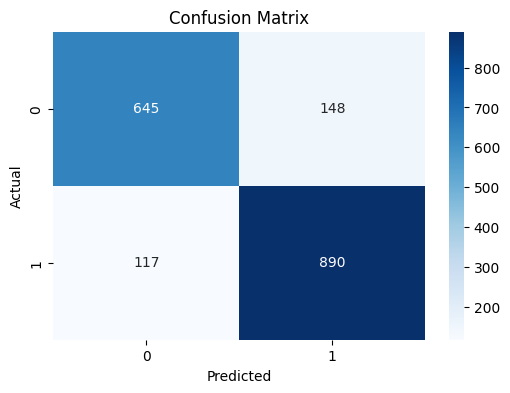

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Logistic Regression Model
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression Model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()